# Fashion MNIST training model

Workera Google Colab: https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%204%20-%20Lesson%202%20-%20Notebook.ipynb

Github fashion mnist: https://github.com/zalandoresearch/fashion-mnist

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.
2.1.0


Importing the Fashion MNIST df:

In [0]:
# Keras already incorporates the fashion mnist dataset:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

print(training_images.shape)
print(test_images.shape)

# other methods to import the fashion mnist dataset:
# https://github.com/zalandoresearch/fashion-mnist
# import data from tensor flow
# from tensorflow.examples.tutorials.mnist import input_data
# data = input_data.read_data_sets('data/fashion')

# data.train.next_batch(BATCH_SIZE)


# import with a url:
# data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


Plotting the images:

5

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

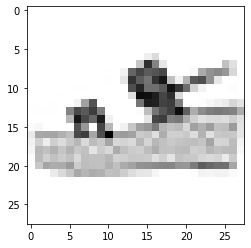

In [0]:
# Plotting a chosen image with plt:
img_idx = 12
plt.imshow(training_images[img_idx], cmap='Greys')
display(training_labels[img_idx])
display(training_images[img_idx])


Feature scaling:

In [0]:
# Feature scaling to [0,1]:
max_value = max(np.amax(np.amax(training_images, axis=0), axis=1))
training_images = training_images / max_value
test_images = test_images / max_value

print( max(np.amax(np.amax(training_images, axis=0), axis=1)) )
print( max(np.amax(np.amax(test_images, axis=0), axis=1)) )

1.0
1.0


# NN model set-up:

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)),
                              tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                              tf.keras.layers.Dense(units=10, activation=tf.nn.softmax) ])

In [0]:
model.compile( optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
model.fit(training_images, training_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4983 - accuracy: 0.8233
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3755 - accuracy: 0.8660
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3361 - accuracy: 0.8782
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3121 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2930 - accuracy: 0.8915


# Exercise 1 Model predictions:



In [0]:
# Model performance:
model.evaluate(test_images, test_labels)

# !!! .evaluate is for metrics!!!
# !!! .predict is for predictions!!!


10000/10000 [==============================] - 0s 44us/sample - loss: 0.3493 - accuracy: 0.8738


[0.3492893412351608, 0.8738]

Make prediction

In [0]:
# Predictions for all the test examples:
test_predictions = model.predict(test_images)

# Make prediction for test examples:
test_example = 00

print( test_predictions[test_example] )
print( max(test_predictions[test_example]) )

# print( np.where( max( test_predictions[test_example] ) ) )
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print( max_idx )
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )


[3.2768257e-05 1.6003636e-07 4.5258265e-08 1.7182074e-07 3.0354176e-06
 1.8073965e-02 5.1429506e-06 1.9794108e-02 2.9021572e-05 9.6206164e-01]
0.96206164
9
test example 0 label: 9
test example 0 prediction: 9


Exercise 2 Experiment with number of hidden layer units


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=5)

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 5200
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2010 - accuracy: 0.9413
Epoch 2/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0795 - accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0522 - accuracy: 0.9835
Epoch 4/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0355 - accuracy: 0.9884
Epoch 5/5
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0608 - accuracy: 0.9813
test example5200 probabilities:[1.8215146e-11 3.9805936e-12 7.5618588e-11 6.2010510e-14 9.9999785e-01
 2.1790765e-09 4.0815250e-12 8.0418502e-08 1.6847409e-08 2.0291682e-06]
test example 5200 label: 4
test example 5200 prediction: 4


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=5)

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 5200
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.1864 - accuracy: 0.9443
Epoch 2/5
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0719 - accuracy: 0.9776
Epoch 3/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0481 - accuracy: 0.9845
Epoch 4/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0337 - accuracy: 0.9894
Epoch 5/5
10000/10000 [==============================] - 1s 102us/sample - loss: 0.0688 - accuracy: 0.9802
test example5200 probabilities:[9.48356299e-16 1.03739475e-10 8.53868334e-15 3.79182634e-13
 9.99999166e-01 6.74869605e-10 2.83314062e-13 6.28147845e-08
 9.69268207e-11 7.23122355e-07]
test example 5200 label: 4
test example 5200 prediction: 4


Exercise 5 Add a second hidden layer

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=5)

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 5200
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 196us/sample - loss: 0.1857 - accuracy: 0.9427
Epoch 2/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.0793 - accuracy: 0.9755
Epoch 3/5
60000/60000 [==============================] - 11s 192us/sample - loss: 0.0527 - accuracy: 0.9831
Epoch 4/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.0417 - accuracy: 0.9866
Epoch 5/5
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0737 - accuracy: 0.9804
test example5200 probabilities:[1.30692755e-12 6.12217654e-09 2.78012270e-12 1.16267090e-13
 9.99990582e-01 1.01645103e-12 1.27329430e-12 1.01783876e-07
 3.69187375e-10 9.29192720e-06]
test example 5200 label: 4
test example 5200 prediction: 4


Exercise 6 Epochs

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=15)

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 500
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2611 - accuracy: 0.9253
Epoch 2/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1156 - accuracy: 0.9660
Epoch 3/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0782 - accuracy: 0.9769
Epoch 4/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0596 - accuracy: 0.9814
Epoch 5/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0456 - accuracy: 0.9857
Epoch 6/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0367 - accuracy: 0.9885
Epoch 7/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0292 - accuracy: 0.9908
Epoch 8/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0229 - accuracy: 0.9930
Epoch 9/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0200 - accuracy: 0.9938
Epoch 10

In [0]:
# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )
# print(max(test_labels))

test example0 probabilities:[4.4893120e-13 1.7748912e-11 2.6703967e-10 1.0227207e-06 4.2726637e-18
 8.4792857e-14 9.9071872e-17 9.9999893e-01 6.6406797e-11 3.1548192e-10]
test example 0 label: 7
test example 0 prediction: 7


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=30)

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 500
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2582 - accuracy: 0.9270
Epoch 2/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1137 - accuracy: 0.9651
Epoch 3/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0774 - accuracy: 0.9766
Epoch 4/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0575 - accuracy: 0.9824
Epoch 5/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0448 - accuracy: 0.9865
Epoch 6/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0357 - accuracy: 0.9887
Epoch 7/30
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0275 - accuracy: 0.9910
Epoch 8/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0219 - accuracy: 0.9932
Epoch 9/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0199 - accuracy: 0.9937
Epoch 10

Exercise 8 Callback to stop when converged

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

# Callback function
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.03):
      print('\n Reached 97% accurcay. Training converged!')
      self.model.stop_training = True

callbacks = myCallback()

# Dataset
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Feature scaling
training_images = training_images/255.0
test_images = test_images/255.0

# NN model set-up
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=tf.compat.v1.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(training_images, training_labels, epochs=30, callbacks=[callbacks])

# Metrics
model.evaluate(test_images, test_labels)

# Predictions
test_predictions = model.predict(test_images)
test_example = 5000
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

2.1.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2612 - accuracy: 0.9258
Epoch 2/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1151 - accuracy: 0.9657
Epoch 3/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0786 - accuracy: 0.9761
Epoch 4/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0582 - accuracy: 0.9830
Epoch 5/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0470 - accuracy: 0.9848
Epoch 6/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0373 - accuracy: 0.9883
Epoch 7/30
59744/60000 [============================>.] - ETA: 0s - loss: 0.0295 - accuracy: 0.9905
 Reached 97% accurcay. Training converged!
10000/10000 [==============================] - 0s 44us/sample - loss: 0.0743 - accuracy: 0.9784
test example5000 probabilities:[2.3427819e-11 9.4586068e-11 7.5375318e-08 9.9999571e-01 2.

In [0]:
# Predictions
test_predictions = model.predict(test_images)
test_example = 0
print('test example '+str(test_example)+' probabilities: '+str(test_predictions[test_example]))
max_idx = np.argmax( test_predictions[test_example], axis=0 ) 
print('test example %d label: %d' %(test_example, test_labels[test_example]) )
print('test example %d prediction: %d' %(test_example, max_idx) )

test example0 probabilities:[6.6914376e-09 5.7892530e-10 1.4131993e-07 4.6818666e-05 6.7015363e-14
 3.1867945e-08 2.6462875e-12 9.9994862e-01 1.8534408e-09 4.4644380e-06]
test example 0 label: 7
test example 0 prediction: 7
